# Part -1: Exploratory Data Analaysis of IPL(2008-2019):

#### Thirumurugan Ramar, Btech  CSE,IIIT Guwahati

### Overview:

Performed Exploratory data Analysis on IPL Dataset from Kaggle,which contains IPL data from (2008-2019).We have two files,

##### Matches       :details of each match played

##### Deliveries    :deliveries in all matches put together ball by ball

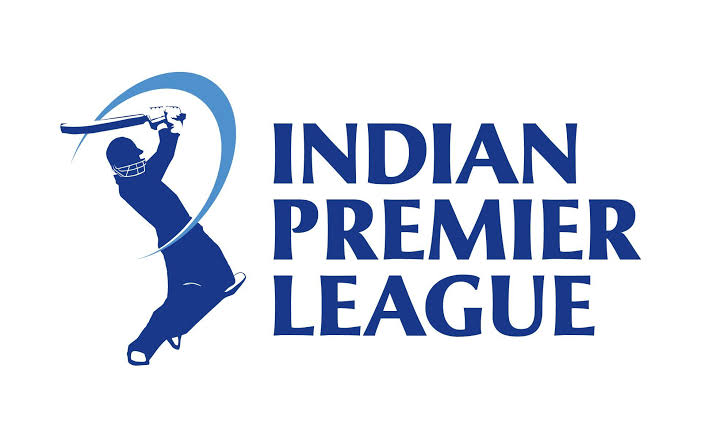



### Imports:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [2]:
# function for Labelling Data

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Input files:

In [3]:
Match_df = pd.read_csv("matches.csv")
Deliveries_df = pd.read_csv("deliveries.csv")

In [4]:
Match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
Deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## 1) Analysis of Match dataset:

In [6]:
print("Number of seasons : ", len(Match_df.season.unique()))

Number of seasons :  12


In [7]:
print("Total no of matches played till 2019 : ", Match_df.shape[0])

Total no of matches played till 2019 :  756


### Number of Matches played per season:

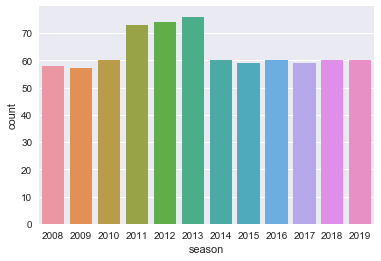

In [8]:
sns.countplot(x='season', data=Match_df,)
plt.show()

##### -> 2011-2013: More than 70 matches were held during these seasons

### Total number of matches held in each venue:

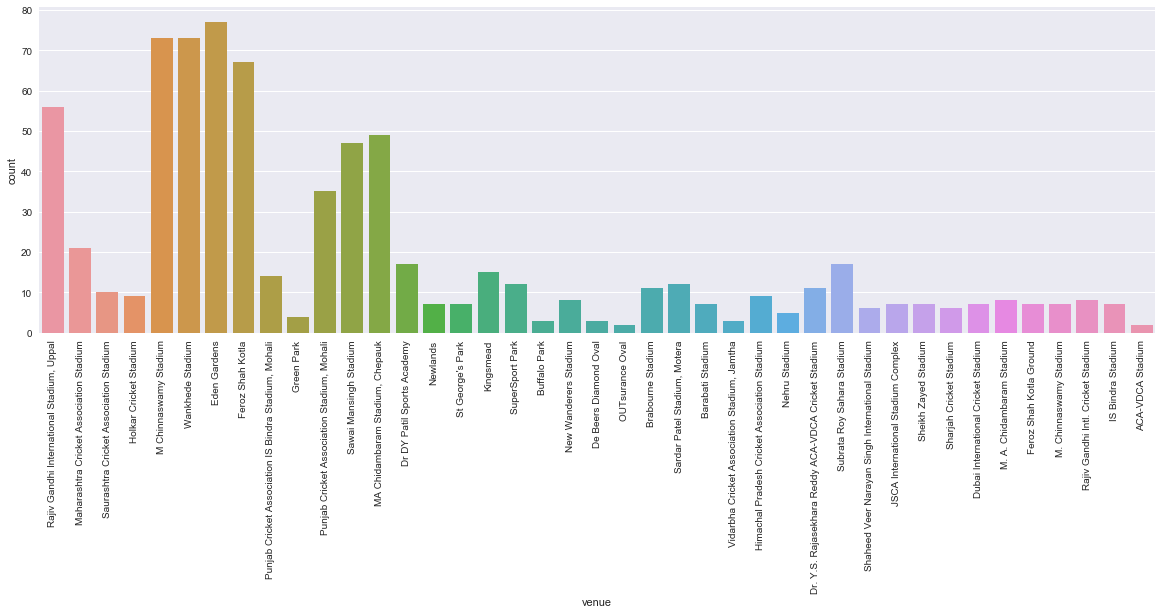

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(x='venue', data=Match_df)
plt.xticks(rotation='vertical')
plt.show()

##### -> EDEN GARDENS has hosted more number of matches  in IPL

### Top 5 Stadiums in IPL from 2008-2019 :

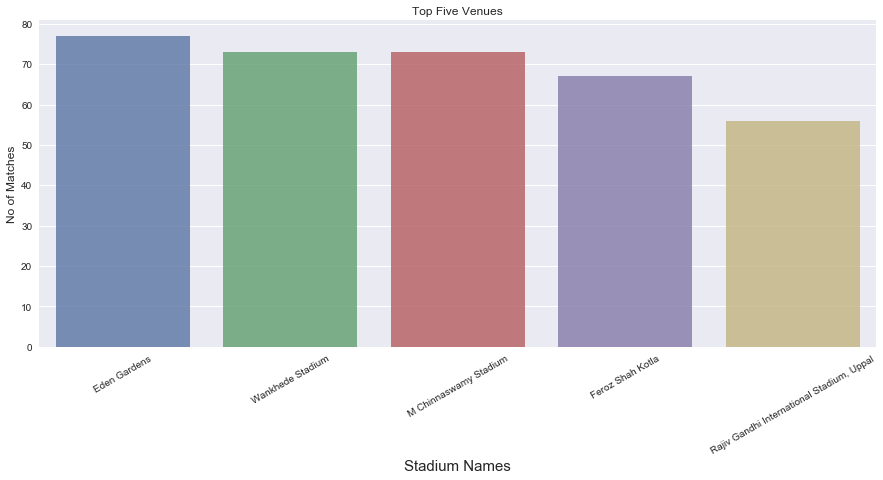

In [10]:
ls=Match_df['venue'].value_counts().sort_values(ascending=False)
ls=ls[:5]
plt.figure(figsize=(15,6))
TOP_5 =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Top Five Venues')
plt.ylabel('No of Matches', fontsize=12)
plt.xlabel('Stadium Names', fontsize=15)
TOP_5.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()

## No of matches played by each team:

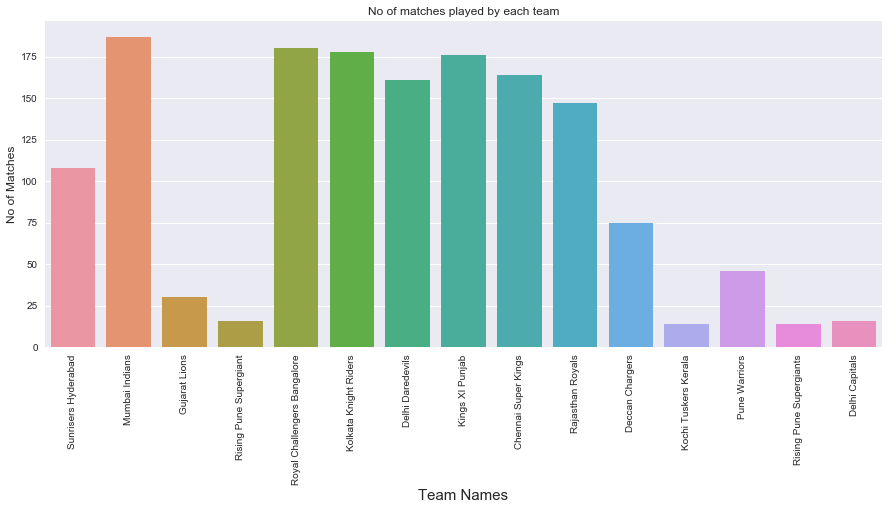

In [11]:
perteam_df = pd.melt(Match_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(15,6))
sns.countplot(x='value', data=perteam_df)
plt.title('No of matches played by each team')
plt.ylabel('No of Matches', fontsize=12)
plt.xlabel('Team Names', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### -> MUMBAI INDIANS has played most no of matches,followed by ROYAL CHALLENGERS BANGAORE

### Number of Wins per team:

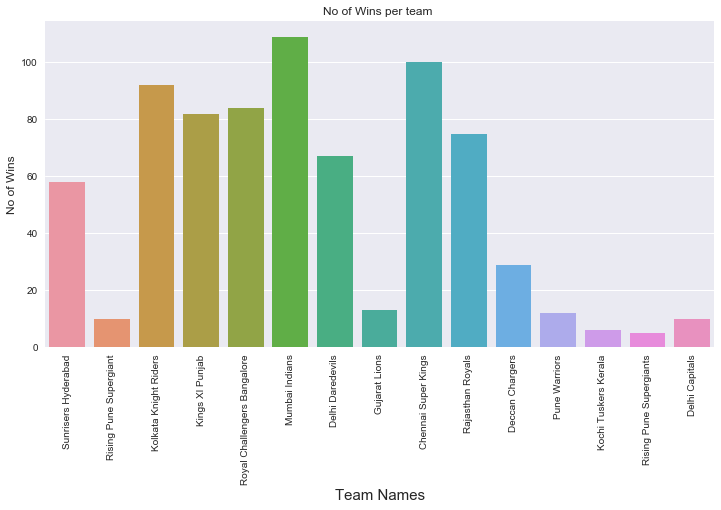

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=Match_df)
plt.title('No of Wins per team ')
plt.ylabel('No of Wins', fontsize=12)
plt.xlabel('Team Names', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### -> MUMBAI INDIANS has won more number matches(more than 100),followed by CHENNAI SUPER KINGS 

### Man of the match across 12 seasons:

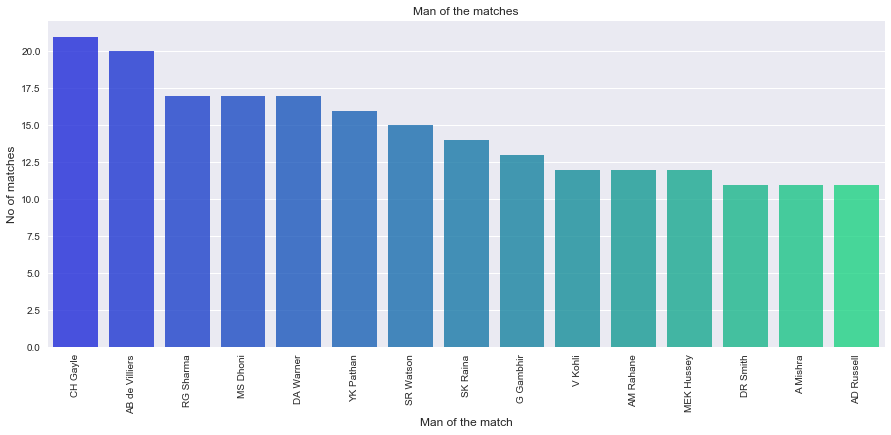

In [13]:
man_of_the_match=Match_df['player_of_match'].value_counts()
man_of_the_match=man_of_the_match[:15]
plt.figure(figsize=(15,6))
man_of_matches=sns.barplot(man_of_the_match.index, man_of_the_match.values, alpha=0.8,palette='winter')
plt.title('Man of the matches')
plt.ylabel('No of matches', fontsize=12)
plt.xlabel('Man of the match', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

##### -> CHRIS GAYLE tops the list followed by AB DE VILLIERS

### Top 5 Umpires:

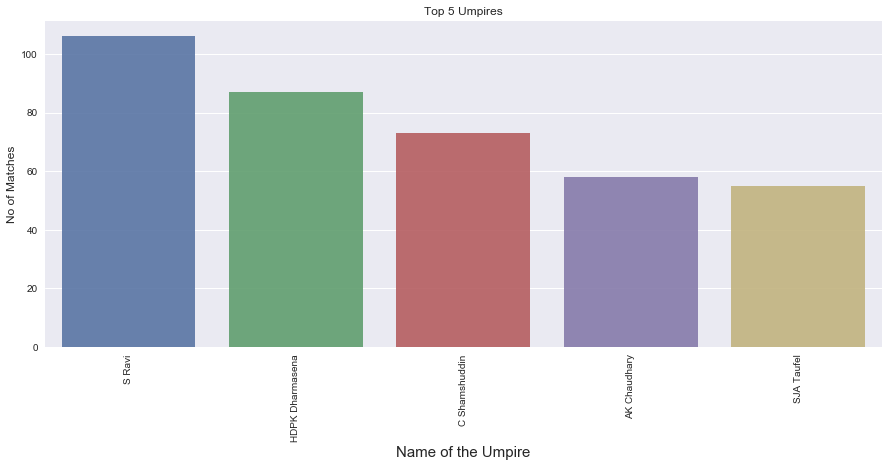

In [14]:
umpire_df=pd.concat([Match_df['umpire1'],Match_df['umpire2']]).value_counts().sort_values(ascending=False)
umpire_df=umpire_df[:5]
plt.figure(figsize=(15,6))
Most_umpired =sns.barplot(x=umpire_df.index, y=umpire_df.values, alpha=0.9)
plt.title('Top 5 Umpires')
plt.ylabel('No of Matches', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### -> S.Ravi tops the list followed by Dharmasena

### Champions:

In [15]:
champions_df = Match_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
champions_df.sort_values("season", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')
champions_df=champions_df.reset_index(drop=True)
champions_df

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


## Toss decision Analysis:

### Across 12 seasons:

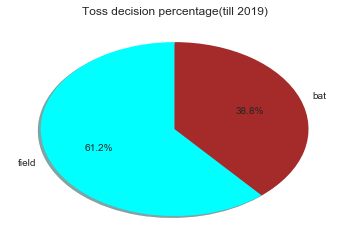

In [16]:
series = Match_df.toss_decision.value_counts()
labels = (np.array(series.index))
sizes = (np.array((series / series.sum())*100))
colors = ['cyan', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage(till 2019)")
plt.show()

##### -> Fielding is the most preferred decision in IPL(61.2%)

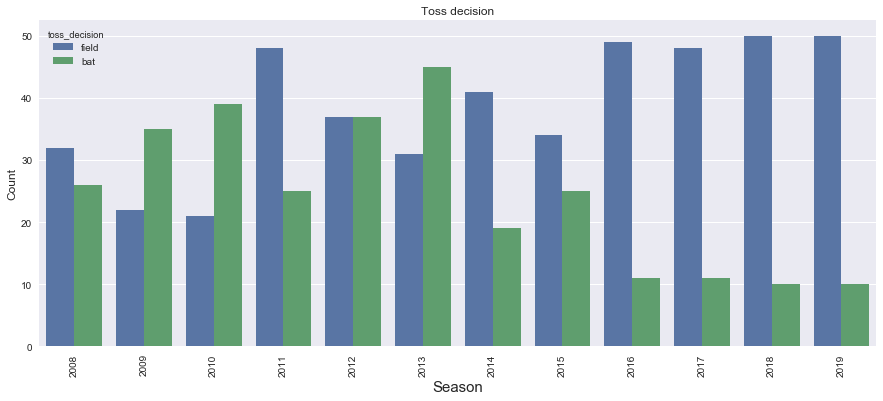

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='season', hue='toss_decision', data=Match_df)
plt.title('Toss decision')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Season', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### -> There is a variation in trends of batting and fielding till 2013.
##### -> From 2014 ,Teams highly prefer second batting (trend has become stronger from 2016!)

### What is the Win percentage of teams batting second?

When a team bats second and wins then the number of wickets left with the team to spare are considered and it is said that the winning team won by the remaining wickets.

In [18]:
total_wins = (Match_df.win_by_wickets>0).sum()
total_loss = (Match_df.win_by_wickets==0).sum()

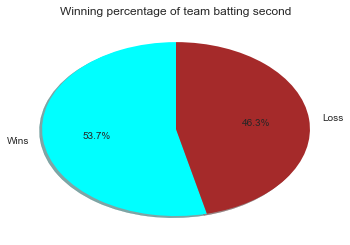

In [19]:
labels = ["Wins", "Loss"]
total = float(total_wins + total_loss)
sizes = [(total_wins/total)*100, (total_loss/total)*100]
colors = ['cyan', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Winning percentage of team batting second")
plt.show()

##### -> Nearly 54%  of the time,the teams batting second has won the match!

###  Split in each season:

C:\Users\Manikandan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


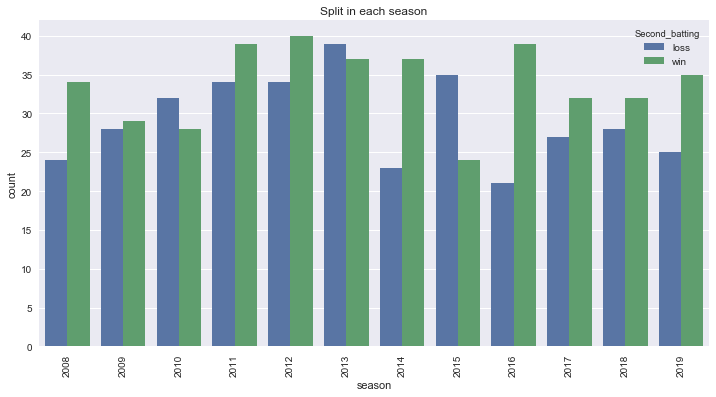

In [20]:
Match_df["Second_batting"] = "win"
Match_df["Second_batting"].ix[Match_df['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='Second_batting', data=Match_df)
plt.title("Split in each season")
plt.xticks(rotation='vertical')
plt.show()

##### -> Second batting has given an advantage in the latest seasons! (except 2015)

### Split across teams:

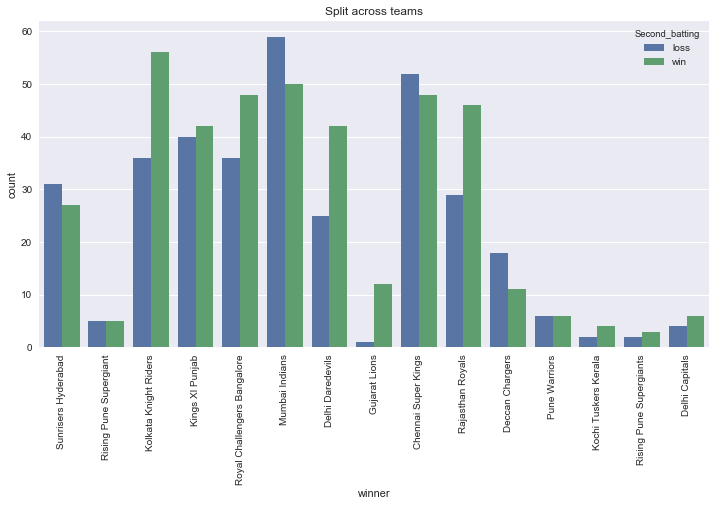

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', hue='Second_batting', data=Match_df)
plt.title("Split across teams")
plt.xticks(rotation='vertical')
plt.show()

##### -> KKR,RCB,DD,GL,RR are good at chasing

### Win percentage of toss winners:

C:\Users\Manikandan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


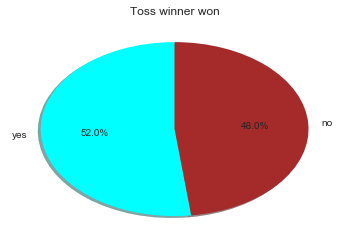

In [22]:
Match_df['toss_winner_won'] = 'no'
Match_df['toss_winner_won'].ix[Match_df.toss_winner == Match_df.winner] = 'yes'
series = Match_df.toss_winner_won.value_counts()
labels = (np.array(series.index))
sizes = (np.array((series /series.sum())*100))
colors = ['cyan', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner won")
plt.show()

##### -> Winning toss gives  a slight advantage over the other team! (52%)

### Split in each season:

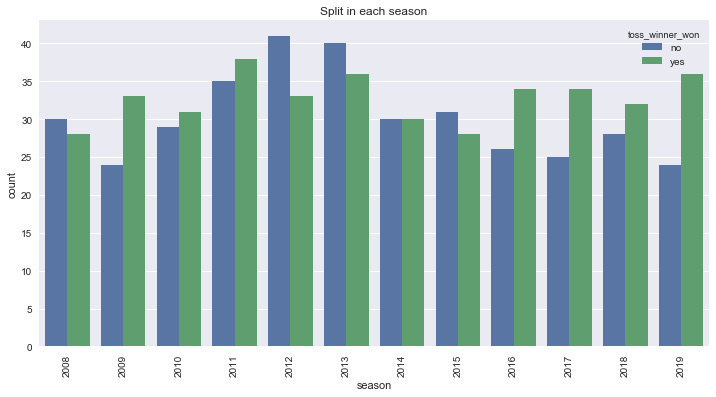

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_winner_won', data=Match_df)
plt.title("Split in each season")
plt.xticks(rotation='vertical')
plt.show()

##### -> From 2016,the trend of toss winners winning the game is strong(most significant in 2019).

### Split across teams:

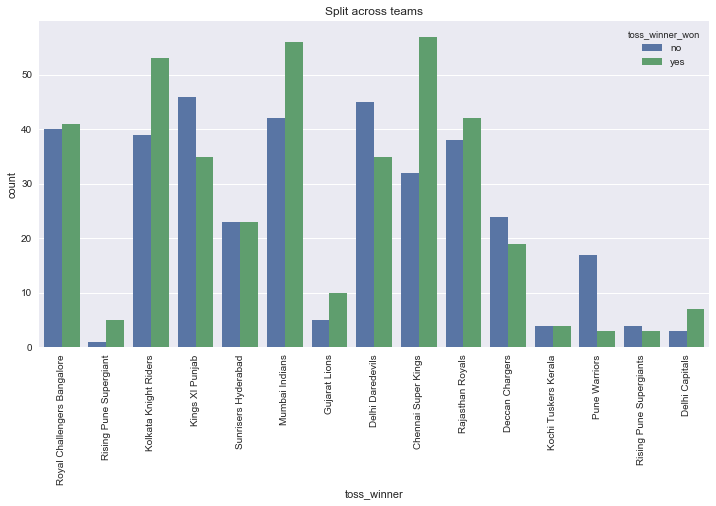

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_won', data=Match_df)
plt.title("Split across teams")
plt.xticks(rotation='vertical')
plt.show()

##### -> CSK has very good chances of winning the game,on winning the toss!
##### -> RCB and SRH  has almost no effect on winning the toss

### Analysis of Top 3 Stadiums:

#### Eden Garden:

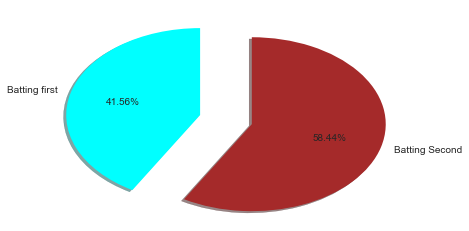

In [25]:
temp_stadium = Match_df.loc[(Match_df['venue']=='Eden Gardens')]
Win_by_runs=temp_stadium[temp_stadium['win_by_runs']>0]
slices=[len(Win_by_runs),len(temp_stadium)-len(Win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['cyan','brown'])
plt.show()

#### Wankhede Stadium:

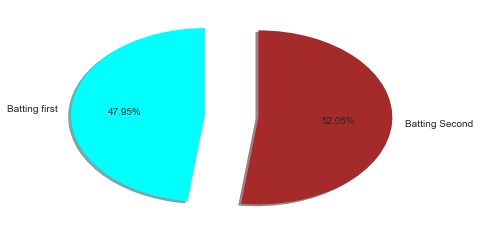

In [26]:
temp_stadium = Match_df.loc[(Match_df['venue']=='Wankhede Stadium')]
Win_by_runs=temp_stadium[temp_stadium['win_by_runs']>0]
slices=[len(Win_by_runs),len(temp_stadium)-len(Win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['cyan','brown'])
plt.show()

#### M Chinnaswamy Stadium:

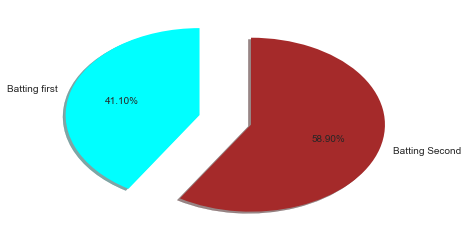

In [27]:
temp_stadium = Match_df.loc[(Match_df['venue']=='M Chinnaswamy Stadium')]
Win_by_runs=temp_stadium[temp_stadium['win_by_runs']>0]
slices=[len(Win_by_runs),len(temp_stadium)-len(Win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['cyan','brown'])
plt.show()

## 2)Analysis of Deliveries Dataset:

In [28]:
Deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Batsman Analysis:

### Top 10 run scorers:

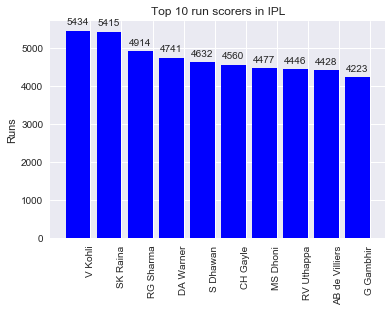

In [29]:
scorers_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
scorers_df = scorers_df[:10]

labels = np.array(scorers_df['batsman'])
ind = np.arange(len(labels))
width = 0.8

#subplot
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(scorers_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Runs")
ax.set_title("Top 10 run scorers in IPL")
autolabel(rects)
plt.show()

##### -> Virat Kohli tops the list! 

### Top 10 Batsmen with most number of 4's :

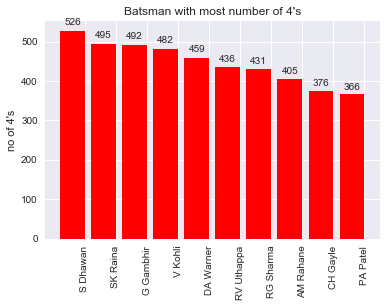

In [30]:
boun_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
boun_df = boun_df[:10]

labels = np.array(boun_df['batsman'])
ind = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(boun_df['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("no of 4's")
ax.set_title("Batsman with most number of 4's")
autolabel(rects)
plt.show()

##### -> Dhawan has hit the most number of 4's 

### Top 10 batsmen with most number of 6's:

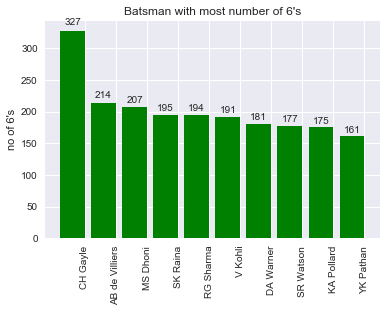

In [31]:
boun_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
boun_df = boun_df[:10]

labels = np.array(boun_df['batsman'])
ind = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(boun_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("no of 6's")
ax.set_title("Batsman with most number of 6's")
autolabel(rects)
plt.show()

##### -> Chris Gayle tops the list in a huge margin:
##### -> MS Dhoni has hit more no of 6's among Indian players

### Batsmen with most no of dot balls:

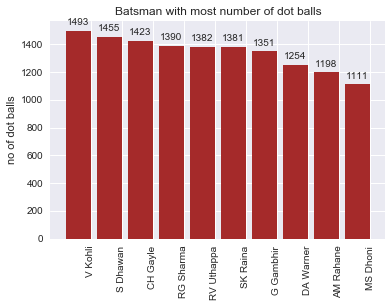

In [32]:
boun_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
boun_df = boun_df[:10]

labels = np.array(boun_df['batsman'])
ind = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(boun_df['batsman_runs']), width=width, color='brown')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("no of dot balls")
ax.set_title("Batsman with most number of dot balls")
autolabel(rects)
plt.show()

##### -> Virat kohli is the top run scorer as well as he is the batsman with most number of dot balls

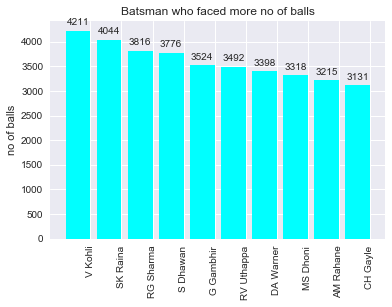

In [33]:
def balls_faced(x):
    return len(x)
boun_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg([balls_faced]).reset_index().sort_values(by='balls_faced', ascending=False).reset_index(drop=True)
boun_df = boun_df[:10]

labels = np.array(boun_df['batsman'])
ind = np.arange(len(labels))
width = 0.8

fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(boun_df['balls_faced']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("no of balls")
ax.set_title("Batsman who faced more no of balls")
autolabel(rects)
plt.show()

##### -> Virat Kohli has faced more number of balls.(top run scorer,most no of dot balls,)

### Bowler Analysis:

### Top 10 Bowlers who bowled more number of balls:

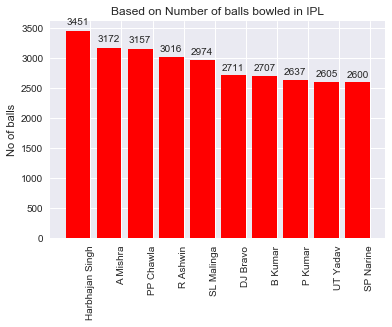

In [34]:
bowl_df = Deliveries_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
bowl_df = bowl_df[:10]

labels = np.array(bowl_df['bowler'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(bowl_df['ball']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("No of balls")
ax.set_title("Based on Number of balls bowled in IPL")
autolabel(rects)
plt.show()

##### -> Harbajan Singh has bowled most number of balls in IPL

### Top 10 Bowlers who have bowled most number of dot balls: 

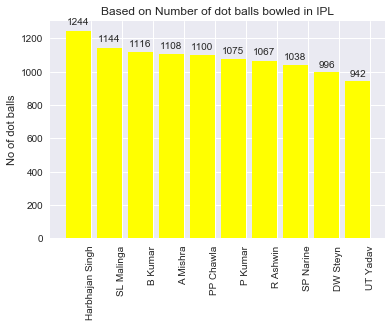

In [35]:
bowl_df = Deliveries_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
bowl_df = bowl_df[:10]

labels = np.array(bowl_df['bowler'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(bowl_df['total_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("No of dot balls")
ax.set_title("Based on Number of dot balls bowled in IPL")
autolabel(rects)
plt.show()

##### -> Harbajan singh has bowled more number of dot balls, followed by Malinga!

### Top 10 Bowlers who has given most number of Extras:

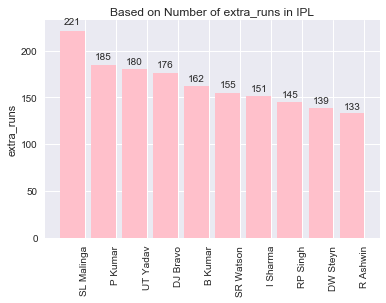

In [36]:
bowl_df = Deliveries_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
bowl_df = bowl_df[:10]

labels = np.array(bowl_df['bowler'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(bowl_df['extra_runs']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("extra_runs")
ax.set_title("Based on Number of extra_runs in IPL")
autolabel(rects)
plt.show()

##### -> Malinga has given most number of extra runs!

### Top 10 Fielders based on wickets:

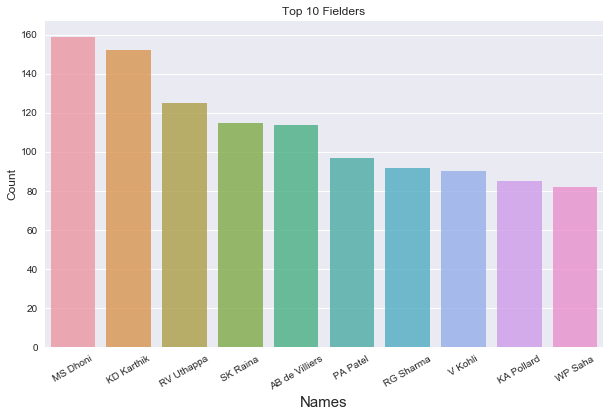

In [37]:
ls=Deliveries_df['fielder'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(10,6))
TOP_10 =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Top 10 Fielders')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Names', fontsize=15)
TOP_10.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()

### Dismissal:

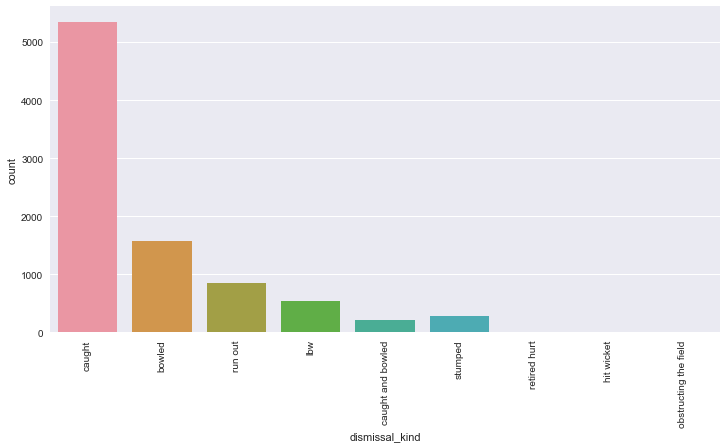

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=Deliveries_df)
plt.xticks(rotation='vertical')
plt.show()

##### -> Caught is the most common dismissal_kind

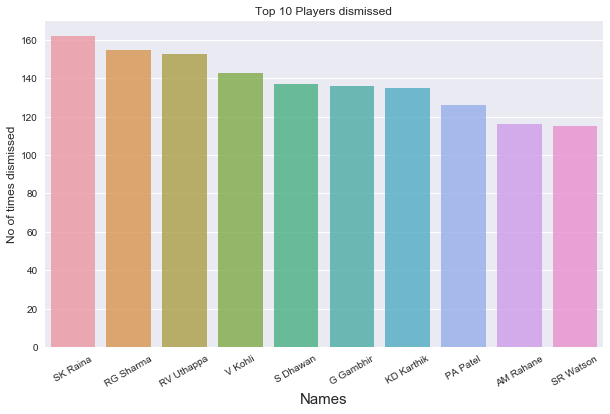

In [39]:
ls=Deliveries_df['player_dismissed'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(10,6))
TOP_10 =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Top 10 Players dismissed')
plt.ylabel('No of times dismissed', fontsize=12)
plt.xlabel('Names', fontsize=15)
TOP_10.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()

##### -> This graph indicates the players who have been dismissed most number of times in IPL.(Opening and Middle Order Batsmen)